# Initial Notes
- Two primary uses for data visualization
    1. to explore data
    2. to communicate data

# matplotlib
- widely used, but starting to show its age

In [1]:
import matplotlib.pyplot as plt

In [2]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

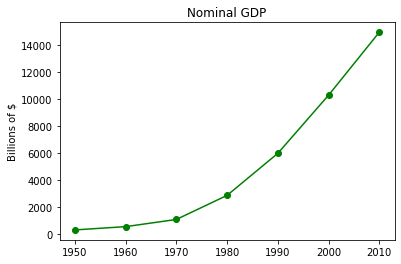

In [3]:
# Create a line chart, years (x-axis), gdp (y-axis)
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.ylabel("Billions of $")
plt.show()

## Bar Charts
- good choice for showing how some quantity varies among some *discrete* set of items

In [4]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

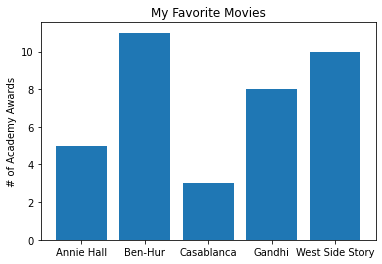

In [6]:
# plot bars with left x-coordinates [0,1,2,3,4], heights [num_oscars]
plt.bar(range(len(movies)), num_oscars)
plt.title("My Favorite Movies")
plt.ylabel("# of Academy Awards")

# label axis with movie names at bar centers
plt.xticks(range(len(movies)), movies)

plt.show()

- a bar chart can also be a good choice for plotting histograms of bucketed numeric values

In [8]:
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

In [10]:
# Bucket grades by decile, but put 100 in with the 90s
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

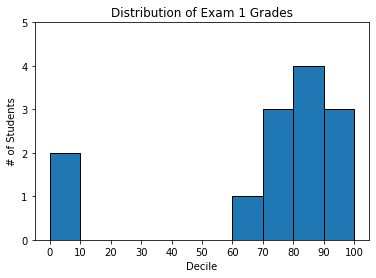

In [13]:
plt.bar([x + 5 for x in histogram.keys()],     # Shift bars right by 5
        histogram.values(),                    # Give each bar its correct height
        10,                                    # Give each bar a width of 10
        edgecolor=(0, 0, 0))                   # Black edges for each bar

plt.axis([-5, 105, 0, 5])                      # x-axis from -5 to 105, y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)])        # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")

plt.show()

- we chose a width of 10 to fill the entire decile
- we shifted the bars to the right by 5 to move the center to 5, 15, 25...
- added black edge to be visually distinct

- **it is bad form to have your y-axis not start at 0**
    - can easily mislead people

## Line Charts
- good choice for showing trends

In [14]:
variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

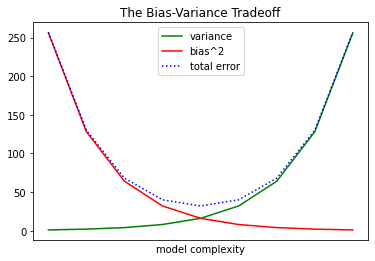

In [15]:
# We can make multiple calls to plt.plot
# to show multiple series on the same chart

plt.plot(xs, variance, 'g-', label='variance')        # green solid line
plt.plot(xs, bias_squared, 'r-', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error, 'b:', label='total error')  # blue dotted line

# Because we've assigned labels to each series,
# we can get a legend for free (loc=9 means "top-center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")

plt.show()

## Scatterplots
- good for visualizing relationship between two paired sets of data

In [16]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

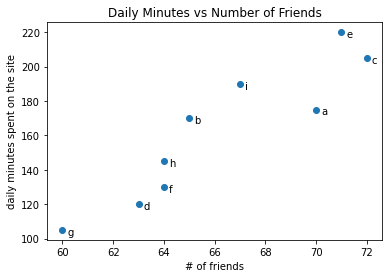

In [17]:
plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                 xy=(friend_count, minute_count),         # Put the label with its point
                 xytext=(5, -5),                          # but slightly offset
                 textcoords='offset points'
                )
plt.title("Daily Minutes vs Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")

plt.show()

- if your scattering comparable variables, you might get a misleading picture if you let matplotlib choose the scale

In [18]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

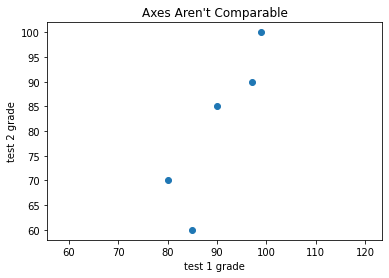

In [21]:
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.axis("equal")

plt.show()

- if we make a call to plt.axis("equal"), the plot more accurately shows the most variation occurs on test 2

## For further explanation

- The matplotlib Gallery will give you a good idea of the sorts of things you can do with matplotlib (and how to do them).
    - https://matplotlib.org/gallery.html
- seaborn is built on top of matplotlib and allows you to easily produce prettier (and more complex) visualizations.
    - https://seaborn.pydata.org/
- Altair is a newer Python library for creating declarative visualizations.
    - https://altair-viz.github.io/
- D3.js is a JavaScript library for producing sophisticated interactive visualizations for the web. Although it is not in Python, it is widely used, and it is well worth your while to be familiar with it.
    - http://d3js.org/
- Bokeh is a library that brings D3-style visualizations into Python.
    - http://bokeh.pydata.org/